In [220]:
#---- Import necessary libraries ----#
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import pandas as pd
from astropy.constants import G, c, M_sun, hbar
import astropy.units as u
from scipy.optimize import fsolve

plt.rcParams.update({
    "text.usetex": True,                
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "figure.dpi": 200,                   
    "grid.alpha": 0.4,                    
})


# Dark matter

Adimensional 

$$

p'' = \frac{p}{m_f^4} \qquad \epsilon'' = \frac{\epsilon}{m_f^4}  \qquad  M'' =  \frac{M}{a} \qquad R'' =  \frac{R}{b}, \qquad a =  \frac{M_p^3}{m_f^2}, \qquad b = \frac{M_p}{m_f^2}
$$

# Quark matter


EoS MIT Bag Model

$$
p = \frac{1}{3}(\epsilon - 4 B)
$$

Adimensional 

$$

p' = \frac{p}{4B} \qquad \epsilon' = \frac{\epsilon}{4B}  \qquad  M' = 2\sqrt{B} \frac{M}{M_p^3} \qquad R' = 2\sqrt{B} \frac{R}{M_p}
$$

$$

p'' = p' \frac{4B}{m_f^4} \qquad \epsilon'' =  \epsilon'\frac{4B}{m_f^4}  \qquad  M' = 2\sqrt{B} \frac{M}{M_p^3} \qquad R' = 2\sqrt{B} \frac{R}{M_p}
$$


In [236]:

m_f = 1e5 #mev^4
list_e_1 = np.linspace(1.2, 1e5, 10000) # adimensional (divided by 4B)

list_p_1= 1/3 * (list_e_1 - 1) # adimensional (divided by 4B)

scale_factor = 1 / (m_f**4)
list_e_quark = list_e_1 * scale_factor
list_p_quark = list_p_1 * scale_factor

#print maximums and minimums of the EoS
print("EoS limits:")
e_min = min(list_e_quark)
e_max = max(list_e_quark)
p_min = min(list_p_quark)
p_max = max(list_p_quark)
print(f"e_min = {e_min:.3e}")
print(f"e_max = {e_max:.3e}")
print(f"p_min = {p_min:.3e}")
print(f"p_max = {p_max:.3e}")



list_e_1 = np.linspace(1+2e-16, 1e5, 2000) # already in units of 4B

list_p_1 = 1/3*(list_e_1 - 1)

#print maximums of e and p
max_e_1 = np.max(list_e_1)
max_p_1 = np.max(list_p_1)
print(f"Max energy density {max_e_1} 4B")
print(f"Max pressure : {max_p_1} 4B")

min_e_1 = np.min(list_e_1)
min_p_1 = np.min(list_p_1)
print(f"Min energy density: {min_e_1} 4B")
print(f"Min pressure : {min_p_1} 4B")

scale_factor = 1 / (m_f**4)
list_e_quark = list_e_1 * scale_factor
list_p_quark = list_p_1 * scale_factor


# 1. Defineix primer la pressió (que és la variable independent a la TOV)
# Ha de començar des de 0 exactament
list_p_1 = np.linspace(0, 1e5, 10000) 

# 2. Defineix l'energia segons el model MIT Bag: e = 3p + 4B
# (Si escales per 4B, llavors e = 3p + 1)
list_e_1 = 3 * list_p_1 + 1

# 3. Ara aplica el factor d'escala si realment el necessites
scale_factor = 1 / (m_f**4)
list_p_quark = list_p_1 * scale_factor
list_e_quark = list_e_1 * scale_factor

max_e_1 = np.max(list_e_1)
max_p_1 = np.max(list_p_1)
print(f"Max energy density {max_e_1} 4B")
print(f"Max pressure : {max_p_1} 4B")

min_e_1 = np.min(list_e_1)
min_p_1 = np.min(list_p_1)
print(f"Min energy density: {min_e_1} 4B")
print(f"Min pressure : {min_p_1} 4B")

# print maximums of quark list
max_e_quark = np.max(list_e_quark)
max_p_quark = np.max(list_p_quark)
print(f"Max energy density {max_e_quark:.3e}")
print(f"Max pressure : {max_p_quark:.3e}")
min_e_quark = np.min(list_e_quark)
min_p_quark = np.min(list_p_quark)
print(f"Min energy density: {min_e_quark:.3e} ")
print(f"Min pressure : {min_p_quark:.3e} ")


EoS limits:
e_min = 1.200e-20
e_max = 1.000e-15
p_min = 6.667e-22
p_max = 3.333e-16
Max energy density 100000.0 4B
Max pressure : 33333.0 4B
Min energy density: 1.0000000000000002 4B
Min pressure : 7.401486830834377e-17 4B
Max energy density 300001.0 4B
Max pressure : 100000.0 4B
Min energy density: 1.0 4B
Min pressure : 0.0 4B
Max energy density 3.000e-15
Max pressure : 1.000e-15
Min energy density: 1.000e-20 
Min pressure : 0.000e+00 


The EoS table is independent on the value of B. Is adapted to match limits of dark matter

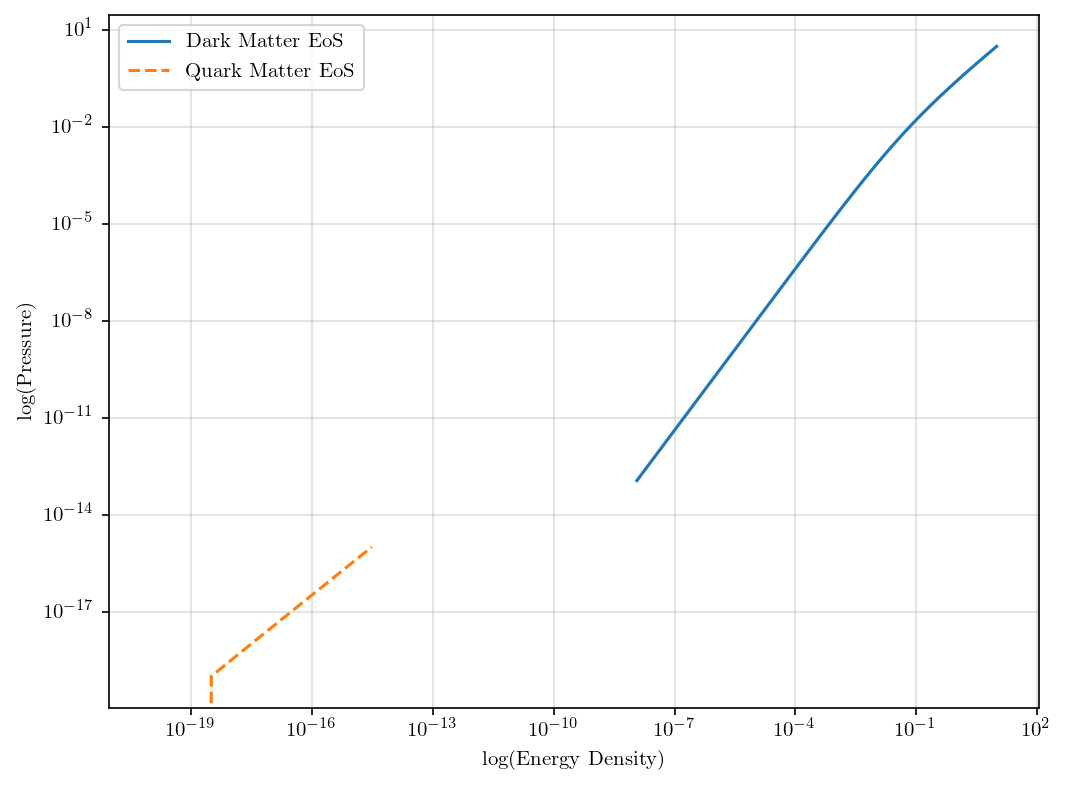

4398 4398
10000 10000


In [237]:
# The EoS is independent of the mass scale, so we can work in dimensionless units
def p(z):
    factor = 1 / (24 * np.pi**2)
    term1 = (2*z**3-3*z)
    term2 = (1+z**2)**0.5
    term3 = 3 * np.arcsinh(z)
    return factor * (term1*term2 + term3) # p'

def e(z):
    factor = 1 / (8 * np.pi**2)
    term1 = (2*z**3 + z)
    term2 = (1+z**2)**0.5
    term3 = np.arcsinh(z)
    return factor * (term1*term2 - term3) # e'

max_kf = 1e3
min_kf = 1e-3
number_points = int(1e6)

list_kf = np.linspace(min_kf, max_kf, number_points)

list_p_total = np.array(p(list_kf))
list_e_total = np.array(e(list_kf))
e_min = 1e-8
e_max = 10
mask = (list_e_total >= e_min) & (list_e_total <= e_max)
list_e_DM = list_e_total[mask]
list_p_DM = list_p_total[mask]

plt.figure(figsize=(8,6), dpi=150)
plt.plot(list_e_DM, list_p_DM, label ='Dark Matter EoS')
plt.plot(list_e_quark, list_p_quark, linestyle='--', label ='Quark Matter EoS')
plt.xlabel('log(Energy Density)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('log(Pressure)')
plt.grid()
plt.legend()
plt.show()

print(len(list_e), len(list_p))
print(len(list_e_1_adim), len(list_p_1_adim))



To solved the coupled equations, I need to use the same adimensionalization, otherwhise doesn't have physical sense

In [238]:
# Print minimum value of dm and quark

minimum_p_DM = np.min(list_p_DM)
minimum_e_DM = np.min(list_e_DM)
minimum_p_quark = np.min(list_p_quark)
minimum_e_quark = np.min(list_e_quark)


maximum_p_DM = np.max(list_p_DM)
maximum_e_DM = np.max(list_e_DM)
maximum_p_quark = np.max(list_p_quark)
maximum_e_quark = np.max(list_e_quark)

print("Minimum pressure DM:", minimum_p_DM)
print("Minimum pressure quark:", minimum_p_quark)
print()
print("Minimum energy density DM:", minimum_e_DM)
print("Minimum energy density quark:", minimum_e_quark)
print()
print("Maximum pressure DM:", maximum_p_DM)
print("Maximum pressure quark:", maximum_p_quark)
print()
print("Maximum energy density DM:", maximum_e_DM)
print("Maximum energy density quark:", maximum_e_quark)


print('list_p_quark[700], list_e_quark[700]', list_p_quark[10], list_e_quark[10])


Minimum pressure DM: 1.1352502142720385e-13
Minimum pressure quark: 0.0

Minimum energy density DM: 1.1584558952132733e-08
Minimum energy density quark: 1e-20

Maximum pressure DM: 3.0328739883112337
Maximum pressure quark: 9.999999999999999e-16

Maximum energy density DM: 9.995346063927869
Maximum energy density quark: 3.00001e-15
list_p_quark[700], list_e_quark[700] 1.0001000100010002e-18 3.0103000300030003e-18


Two fluid

In [239]:
# ----------------------------------------------------
# TOV equations
# ----------------------------------------------------

def ode_TOV(r, x):
    p1, M1, p2, M2 = x
    
    e1 = np.interp(p1, list_p_quark, list_e_quark)
    e2 = np.interp(p2, list_p_DM, list_e_DM) 
    M = M1 + M2

    if M < 1e-14:
        term2 = 1 + 3 * (p1 + p2) / (e1 + e2)
    else:
        term2 = 1 + 4 * np.pi * r**3 * (p1 + p2) / M


    factor = - M * e1 / r**2
    term1 = (1 + p1 / e1)
    #term2 = (1 + 4 * np.pi * r**3 * (p1 + p2) / M)
    term3 = 1 - 2 * M / r

    if term3 <= 0:
        raise RuntimeError("Horizon reached")

    
    if p1 <= 0.:
        dp1dr = 0.
    else:
        dp1dr = factor * term1 * term2 / term3

    if p2 <= 0.:
        dp2dr = 0.
        dM2dr = 0
    else:   
        factor = - M * e2 / r**2
        dp2dr = factor * (1 + p2 / e2) * term2 / term3
        dM2dr = 4 * np.pi * r**2 * e2


    dM1dr = 4 * np.pi * r**2 * e1

    return [dp1dr, dM1dr, dp2dr, dM2dr]


def quark_surface_event(r, x):
    return x[0]   # Zero-crossing detector

quark_surface_event.terminal = True
quark_surface_event.direction = -1  # Only trigger going from + to -



#Initial conditions

r0 = 1e-6
central_energy_quark = 1000 * hc**3 / (m_f**4) #1000 mev /fm^3# i want this specific value
central_pressure_quark = np.interp(central_energy_quark, list_e_quark, list_p_quark)
central_mass_quark = (4/3) * np.pi * r0**3 * central_energy_quark
hc = 197.3269804  # MeV fm
central_pressure_DM_physical = 3e6 * hc**3  #3e6 mev /fm^3# i want this specific value
central_pressure_DM = central_pressure_DM_physical / m_f**4  # adimensional
central_energy_DM = np.interp(central_pressure_DM, list_p_DM, list_e_DM)
central_mass_DM = (4/3) * np.pi * r0**3 * central_energy_DM

x0 = [central_pressure_quark, central_mass_quark, central_pressure_DM, central_mass_DM]

print("Central pressure quark:", central_pressure_quark)
print("Central energy density quark:", central_energy_quark)
print("Central mass quark:", central_mass_quark)
print("Central pressure DM:", central_pressure_DM)
print("Central energy density DM:", central_energy_DM)
print("Central mass DM:", central_mass_DM)

# ----------------------------------------------------
# Solve ODE
# ----------------------------------------------------

sol = solve_ivp(
    ode_TOV,
    (r0, 1e12),
    x0,
    events=quark_surface_event,
    rtol=1e-8,
    atol=1e-10
)

radius = sol.t
pressure_1 = sol.y[0]
mass_1 = sol.y[1]
pressure_2 = sol.y[2]
mass_2 = sol.y[3]


final_pressure_raw = sol.y[0, -1]
print("Final raw quark pressure:", final_pressure_raw)

final_pressure_raw = sol.y[2, -1]
print("Final raw DM pressure:", final_pressure_raw)


idx_q = np.where(pressure_1 <= p_tol)[0]

if len(idx_q) > 0:
    R_quark = radius[idx_q[0]]
else:
    R_quark = None

idx_dm = np.where(pressure_2 <= p_tol)[0]

if len(idx_dm) > 0:
    R_DM = radius[idx_dm[0]]
else:
    R_DM = None


if R_quark is not None and R_DM is not None:
    if R_quark < R_DM:
        print("Quark pressure goes to zero first")
    elif R_DM < R_quark:
        print("DM pressure goes to zero first")
    else:
        print("Both pressures vanish at the same radius")



print(f"Quark surface radius: {R_quark}")
print(f"DM surface radius:    {R_DM}")
print(f"Final integration radius: {radius[-1]}")

# Plot results
# ----------------------------------------------------
plt.figure(figsize=(12,5))

pressure = pressure_1 + pressure_2*0
mass = mass_1 + mass_2*0
plt.subplot(1,2,1)
#plt.plot(radius_km, pressure* (m_f**4))
plt.plot(radius, pressure)
plt.xlabel("R")
plt.ylabel("Pressure")
plt.title("QM Pressure Profile")
plt.grid()

plt.subplot(1,2,2)
#plt.plot(radius_km, mass_in_solar)
plt.plot(radius,mass)
plt.xlabel("R")
plt.ylabel("M")
plt.title("QM Enclosed Mass Profile")
plt.grid()

plt.tight_layout()
plt.show()

# Plot results
# ----------------------------------------------------
plt.figure(figsize=(12,5))

pressure = pressure_1*0 + pressure_2
mass = mass_1*0 + mass_2
plt.subplot(1,2,1)
#plt.plot(radius_km, pressure* (m_f**4))
plt.plot(radius, pressure)
plt.xlabel("R")
plt.ylabel("Pressure")
plt.title("DM Pressure Profile")
plt.grid()

plt.subplot(1,2,2)
#plt.plot(radius_km, mass_in_solar)
plt.plot(radius,mass)
plt.xlabel("R")
plt.ylabel("M")
plt.title("DM Enclosed Mass Profile")
plt.grid()

plt.tight_layout()
plt.show()


# Plot results
# ----------------------------------------------------
plt.figure(figsize=(12,5))

pressure = pressure_1 + pressure_2
mass = mass_1 + mass_2
plt.subplot(1,2,1)
#plt.plot(radius_km, pressure* (m_f**4))
plt.plot(radius, pressure)
plt.xlabel("R")
plt.ylabel("Pressure")
plt.title("Two Fluids Pressure Profile")
plt.grid()

plt.subplot(1,2,2)
#plt.plot(radius_km, mass_in_solar)
plt.plot(radius,mass)
plt.xlabel("R")
plt.ylabel("M")
plt.title("Two Fluids Enclosed Mass Profile")
plt.grid()

plt.tight_layout()
plt.show()

#ptol to units
ptol_physical = p_tol * (m_f**4) / hc**3
print("Pressure tolerance in physical units:", ptol_physical, "MeV/fm^3")


Central pressure quark: 9.999999999999999e-16
Central energy density quark: 7.683505569453849e-11
Central mass quark: 3.2184592867749957e-28
Central pressure DM: 2.3050516708361547e-07
Central energy density DM: 7.113058855375871e-05
Central mass DM: 2.9795111259467545e-22


RuntimeError: Horizon reached

the solver was not working at the beginning because my initial pressure and energy conditions for the quark matter where outside the boundaries of the grid of EoS

lets see how the quark profile should look like

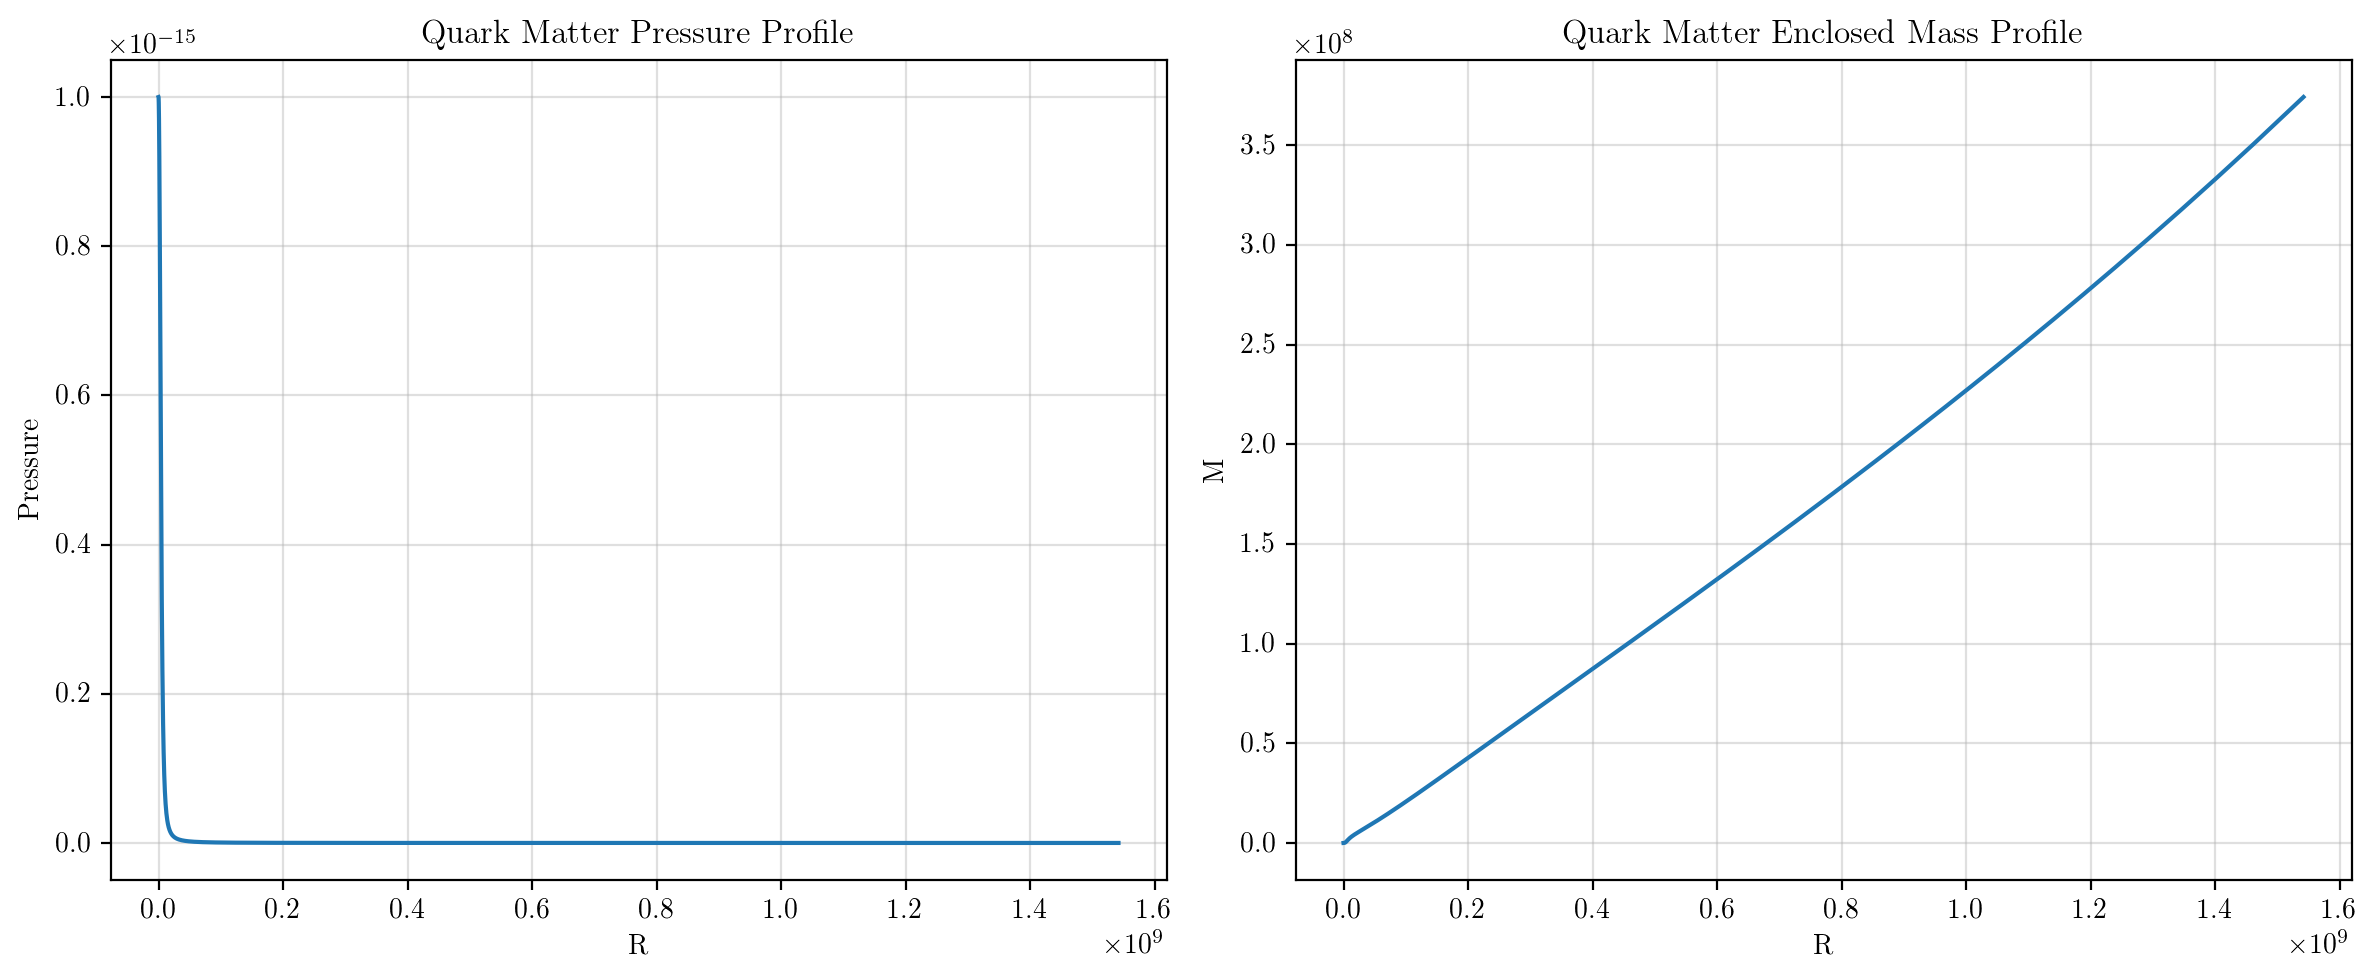

Final raw quark pressure (single fluid): -4.5996382222580886e-37
Final physical quark pressure (single fluid): -4.5996382222580885e-17 MeV4


NameError: name 'b' is not defined

In [241]:
list_e_1_adim = list_e_quark
list_p_1_adim = list_p_quark

def solve_TOV(central_energy, x0):
    def ode_TOV_1(r, x):
            p, M = x
            if p < 0:
                return [0, 0]
            
            e = np.interp(p, list_p_1_adim, list_e_1_adim)

            term1 = e * M / r**2
            term2 = 1 + p / e
            if M == 0:
                term3 = 1.0
            else:
                term3 = 1.0 + 4 * np.pi * r**3 * p / M
            term4 = 1 - 2 * M / r

            if term4 <= 0:
                return [0, 0]

            dpdr = - term1 * term2 * term3 / term4
            dMdr =  4 * np.pi * r**2 * e

            return [dpdr, dMdr]

    
    # ----------------------------------------------------
    # Solve ODE
    # ----------------------------------------------------

    # This solver automatically adjusts step size to control error
    sol = solve_ivp(
        ode_TOV_1,
        (r0, 1e10),     # integrate up to r=100 (large enough)
        x0,
        events=surface_event,
        rtol=1e-8, atol=1e-10 #tolerance error
    )

    if len(sol.t_events[0]) == 0:
        print(f"No surface event for central energy = {central_energy}")
        return np.nan, np.nan, None, None, None
    

    if len(sol.t_events[0]) == 0:
        print(f"No surface event for central energy = {central_energy}")
        return np.nan, np.nan, None, None, None
    
    M_surface = sol.y_events[0][0][1]
    P_surface = sol.y_events[0][0][0]
    R_surface = sol.t_events[0][0]

    if P_surface > 1e-5 :
        print("Final pressure is far from 0:", P_surface * (4 * B_1), 'MeV^4')
    P_profile = sol.y[0]
    M_profile = sol.y[1]
    R_profile = sol.t

    
    return R_surface, M_surface, P_profile, M_profile, R_profile


# ----------------------------------------------------
# Event: stop integration when pressure goes to zero
# ----------------------------------------------------
def surface_event(r, x):
    return x[0]       # detects when between steps the pressure changes sign: pressure = 0, 
                      # the value given is not the pressure at that step, but an interpolation of where the pressure would be zero
surface_event.terminal = True # stop the integration
surface_event.direction = -1 # only detect zero-crossing from positive to negative

# Initial conditions
r0 = 1e-6
central_energy_quark = 1000 * hc**3 / (m_f**4) #1000 mev /fm^3# i want this specific value
central_pressure_quark = np.interp(central_energy_quark, list_e_quark, list_p_quark)
central_mass_quark = (4/3) * np.pi * r0**3 * central_energy_quark
x0_quark = [central_pressure_quark, central_mass_quark]

R_surface, M_surface, P_profile, M_profile, R_profile = solve_TOV(central_energy_quark, x0_quark)


# Plot results
# ----------------------------------------------------
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
#plt.plot(radius_km, pressure* (m_f**4))
plt.plot( R_profile, P_profile)
plt.xlabel("R")
plt.ylabel("Pressure")
plt.title(" Quark Matter Pressure Profile")
plt.grid()

plt.subplot(1,2,2)
#plt.plot(radius_km, mass_in_solar)
plt.plot(R_profile,M_profile)
plt.xlabel("R")
plt.ylabel("M")
plt.title("Quark Matter Enclosed Mass Profile")
plt.grid()

plt.tight_layout()
plt.show()

#final pressure
final_pressure_raw = P_profile[-1]
print("Final raw quark pressure (single fluid):", final_pressure_raw)
# in physical units
final_pressure_physical = final_pressure_raw * (m_f**4) 
print("Final physical quark pressure (single fluid):", final_pressure_physical, "MeV4")
# final mass and radius
radius = R_surface  * b * 1e-15 * hc  # m

solar_mass_in_mev = M_sun.to(u.MeV / c**2).value
M_solar = M_surface * a / solar_mass_in_mev
print("Final quark mass (single fluid):", M_solar, "solar masses")
print("Final quark radius (single fluid):", radius / 1e3, "km")

A flat profile means that the iteration started at a radius very small, inside the swarchild radius. Therefore the denominator is negative, pressure gradients are positive. The solver didnt work and is returning the initial values